## Import packages /data

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score, r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVC
from xgboost import XGBClassifier, XGBRegressor

In [2]:
try:
    import shap
    SHAP_AVAILABLE = True
except ImportError:
    SHAP_AVAILABLE = False

In [3]:
# Load data
df = pd.read_csv('../Data/digital_marketing_campaign_dataset.csv')
df.head(10)

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1
5,8005,25,Female,42925,Social Media,Awareness,9579.388247,0.153795,0.161316,6,2.125850,7.752831,95,5,8,0,3316,IsConfid,ToolConfid,1
6,8006,38,Female,25615,Referral,Awareness,7302.899852,0.040975,0.060977,42,1.753995,10.698672,54,14,3,6,930,IsConfid,ToolConfid,1
7,8007,56,Female,57083,Social Media,Conversion,5324.283667,0.052878,0.188946,48,2.626015,2.987817,96,9,3,0,2983,IsConfid,ToolConfid,1
8,8008,36,Female,140788,Email,Retention,9421.250951,0.023536,0.112585,13,5.472843,14.287421,73,4,8,5,460,IsConfid,ToolConfid,1
9,8009,40,Male,130764,Social Media,Awareness,6229.193333,0.066641,0.169786,22,1.135665,4.613312,14,8,4,8,3789,IsConfid,ToolConfid,1


## EDA & Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

In [5]:
df.describe()

,CustomerID,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,11999.50000,43.625500,84664.196750,5000.944830,0.154829,0.104389,24.751625,5.549299,7.727718,49.799750,9.476875,4.467375,4.485500,2490.268500,0.876500
std,2309.54541,14.902785,37580.387945,2838.038153,0.084007,0.054878,14.312269,2.607358,4.228218,28.901165,5.711111,2.856564,2.888093,1429.527162,0.329031
min,8000.00000,18.000000,20014.000000,100.054813,0.010005,0.010018,0.000000,1.000428,0.501669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9999.75000,31.000000,51744.500000,2523.221165,0.082635,0.056410,13.000000,3.302479,4.068340,25.000000,5.000000,2.000000,2.000000,1254.750000,1.000000
50%,11999.50000,43.000000,84926.500000,5013.440044,0.154505,0.104046,25.000000,5.534257,7.682956,50.000000,9.000000,4.000000,4.000000,2497.000000,1.000000
75%,13999.25000,56.000000,116815.750000,7407.989369,0.228207,0.152077,37.000000,7.835756,11.481468,75.000000,14.000000,7.000000,7.000000,3702.250000,1.000000
max,15999.00000,69.000000,149986.000000,9997.914781,0.299968,0.199995,49.000000,9.999055,14.995311,99.000000,19.000000,9.000000,9.000000,4999.000000,1.000000


In [6]:
num_rows, num_cols = df.shape
print('df has {} rows and {} columns'.format(num_rows, num_cols))

df has 8000 rows and 20 columns


In [7]:
def print_column_info(df):
    col_info = pd.DataFrame({
        'Column Name': df.columns,
        'Data Type': df.dtypes.values,
        'Unique Values': [df[col].nunique() for col in df.columns]
    })
    print(col_info)

print_column_info(df)

            Column Name Data Type  Unique Values
0            CustomerID     int64           8000
1                   Age     int64             52
2                Gender    object              2
3                Income     int64           7789
4       CampaignChannel    object              5
5          CampaignType    object              4
6               AdSpend   float64           8000
7      ClickThroughRate   float64           8000
8        ConversionRate   float64           8000
9         WebsiteVisits     int64             50
10        PagesPerVisit   float64           8000
11           TimeOnSite   float64           8000
12         SocialShares     int64            100
13           EmailOpens     int64             20
14          EmailClicks     int64             10
15    PreviousPurchases     int64             10
16        LoyaltyPoints     int64           3983
17  AdvertisingPlatform    object              1
18      AdvertisingTool    object              1
19           Convers

In [8]:
df.isnull().sum()

CustomerID             0
Age                    0
Gender                 0
Income                 0
CampaignChannel        0
CampaignType           0
AdSpend                0
ClickThroughRate       0
ConversionRate         0
WebsiteVisits          0
PagesPerVisit          0
TimeOnSite             0
SocialShares           0
EmailOpens             0
EmailClicks            0
PreviousPurchases      0
LoyaltyPoints          0
AdvertisingPlatform    0
AdvertisingTool        0
Conversion             0
dtype: int64

In [9]:
# Drop columns with single unique values or identifiers
df_drop = df.drop(columns=['AdvertisingPlatform', 'AdvertisingTool', 'CustomerID'])

###  Drop Irrelevant or Confidential Columns

We remove:
- `CustomerID` (just an identifier)
- `AdvertisingPlatform` and `AdvertisingTool` (labeled as confidential in dataset description)

These fields do not provide predictive value for modeling and are excluded to keep the analysis interpretable.


In [10]:
# Define engagement columns
engagement_cols = ['WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares', 'EmailOpens', 'EmailClicks']
columns_to_encode = ['Gender', 'CampaignChannel', 'CampaignType']

Conversion Distribution:
Conversion
1    0.8765
0    0.1235
Name: proportion, dtype: float64


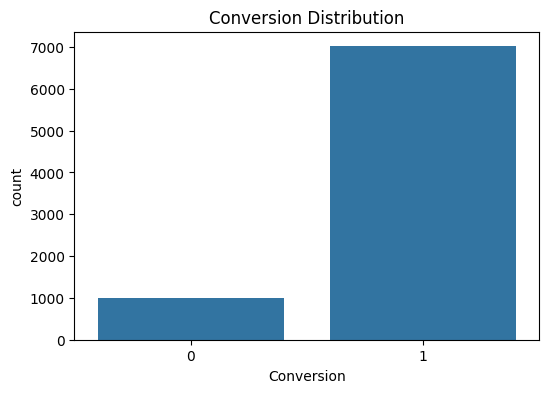

In [11]:
# Quick EDA
print("Conversion Distribution:")
print(df_drop['Conversion'].value_counts(normalize=True))
plt.figure(figsize=(6, 4))
sns.countplot(data=df_drop, x='Conversion')
plt.title('Conversion Distribution')
plt.show()

## MODEL SET 1: REGRESSION (Non-Engagement -> Engagement)
### Predict each engagement variable separately to identify their non-engagement drivers

To deepen our understanding of customer engagement, we modeled each engagement variable (e.g., WebsiteVisits, PagesPerVisit, TimeOnSite, etc.) individually as a regression target, using all non-engagement variables as inputs.

The goal is to identify what upstream factors — such as demographics, campaign types, and marketing strategies — contribute to customer engagement.

We applied four regression models:

Linear Regression

Random Forest Regressor

Gradient Boosting Regressor

XGBoost Regressor

Each model was tuned with GridSearchCV and evaluated using R² score and RMSE.
We also analyzed feature importance for tree-based models.




In [12]:
# Model Set 1: Preprocessing for Non-Engagement Features
print("\n========== MODEL SET 1: Predict Each Engagement Variable from Non-Engagement Variables ==========\n")

# Non-engagement features (used as predictors for all engagement targets)
# Exclude all engagement columns and Conversion to focus on non-engagement drivers
X_eng_base = df_drop.drop(columns=engagement_cols + ['Conversion'])
print("Non-Engagement Features for Model Set 1:", X_eng_base.columns.tolist())

# Encode categorical variables for the base feature set
X_eng_base_encoded = pd.get_dummies(X_eng_base, columns=columns_to_encode, drop_first=False)

# Scale the base features (will be used for all engagement targets)
scaler_eng = StandardScaler()
X_eng_base_scaled = scaler_eng.fit_transform(X_eng_base_encoded)

# Define regression models and hyperparameters
models_reg = {
    'LinearRegression': LinearRegression(),
    'RandomForestReg': RandomForestRegressor(random_state=42),
    'GradientBoostingReg': GradientBoostingRegressor(random_state=42),
    'XGBoostReg': XGBRegressor(random_state=42)
}

param_grid_reg = {
    'LinearRegression': {},
    'RandomForestReg': {'n_estimators': [100, 200], 'max_depth': [3, 5]},
    'GradientBoostingReg': {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 5]},
    'XGBoostReg': {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 5]}
}

# Tree-based models for feature importance
tree_models_reg = ['RandomForestReg', 'GradientBoostingReg', 'XGBoostReg']


========== MODEL SET 1: Predict Each Engagement Variable from Non-Engagement Variables ==========

Non-Engagement Features for Model Set 1: ['Age', 'Gender', 'Income', 'CampaignChannel', 'CampaignType', 'AdSpend', 'ClickThroughRate', 'ConversionRate', 'PreviousPurchases', 'LoyaltyPoints']



----- Predicting WebsiteVisits -----


Training LinearRegression for WebsiteVisits...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best Params: {}
R²: 0.0002, RMSE: 14.2722

Training RandomForestReg for WebsiteVisits...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Params: {'max_depth': 3, 'n_estimators': 200}
R²: 0.0007, RMSE: 14.2687

Training GradientBoostingReg for WebsiteVisits...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
R²: -0.0039, RMSE: 14.3014

Training XGBoostReg for WebsiteVisits...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
R²: -0.0063, RMSE: 14.3186

--- Feature Importance for WebsiteVisits ---

RandomForestReg Top 10 Features for WebsiteVisits:
1. ClickThroughRate: 0.2179
2. AdSpend: 0.1776
3. ConversionRate: 0.1382
4. Income: 0.1325
5. LoyaltyPoints: 0.1303

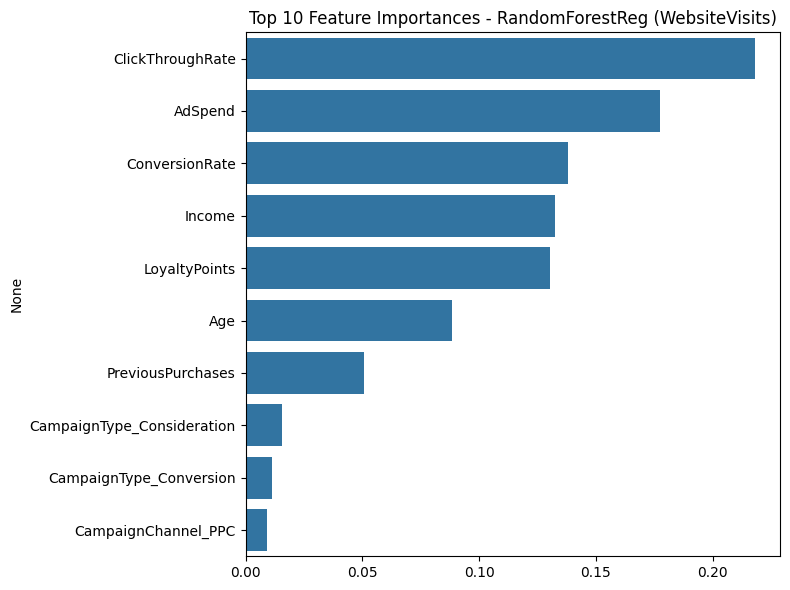


GradientBoostingReg Top 10 Features for WebsiteVisits:
1. ConversionRate: 0.2020
2. ClickThroughRate: 0.1783
3. AdSpend: 0.1582
4. Income: 0.1504
5. LoyaltyPoints: 0.1173
6. Age: 0.0837
7. PreviousPurchases: 0.0303
8. CampaignType_Consideration: 0.0188
9. Gender_Male: 0.0139
10. CampaignChannel_Social Media: 0.0118


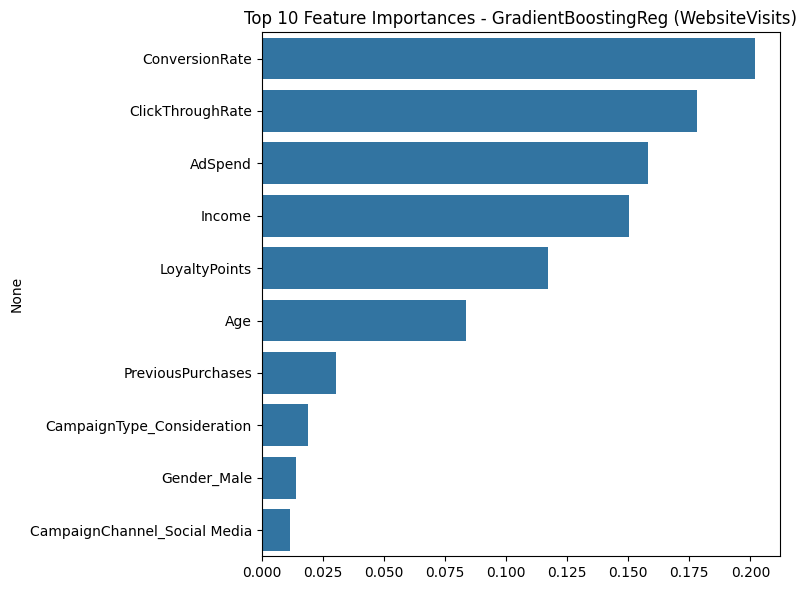


XGBoostReg Top 10 Features for WebsiteVisits:
1. CampaignType_Awareness: 0.0955
2. CampaignChannel_SEO: 0.0881
3. CampaignType_Consideration: 0.0854
4. Age: 0.0846
5. CampaignChannel_PPC: 0.0736
6. CampaignChannel_Referral: 0.0697
7. Gender_Female: 0.0683
8. ClickThroughRate: 0.0646
9. ConversionRate: 0.0607
10. LoyaltyPoints: 0.0579


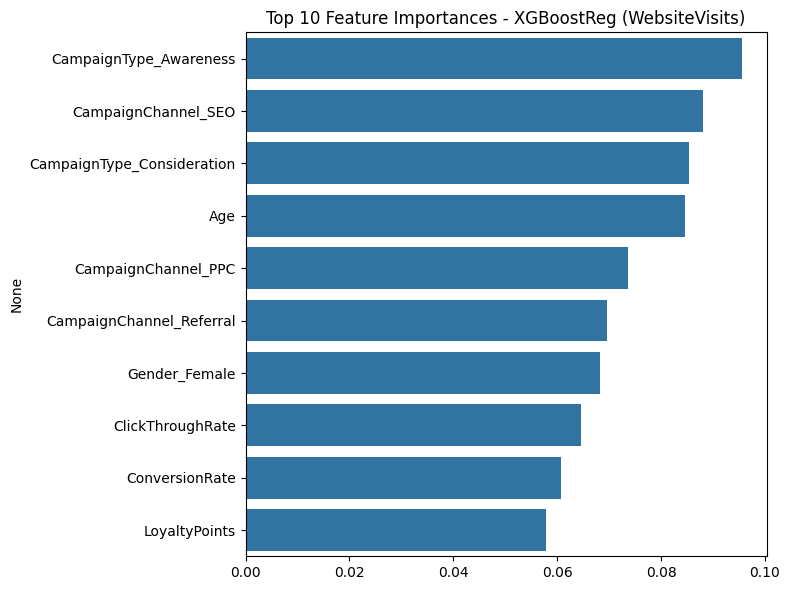

In [13]:
# Model Set 1: Predicting WebsiteVisits
print("\n----- Predicting WebsiteVisits -----\n")

# Target variable
y_eng = df_drop['WebsiteVisits']

# Train/Test Split
X_train_eng, X_test_eng, y_train_eng, y_test_eng = train_test_split(
    X_eng_base_scaled, y_eng, test_size=0.2, random_state=42
)

# Dictionary to store best estimators for WebsiteVisits
best_estimators_website_visits = {}

# Train models
for name, model in models_reg.items():
    print(f"\nTraining {name} for WebsiteVisits...")
    grid = GridSearchCV(model, param_grid_reg[name], cv=3, scoring='r2', verbose=1)
    grid.fit(X_train_eng, y_train_eng)
    best_estimators_website_visits[name] = grid.best_estimator_
    y_pred_eng = grid.predict(X_test_eng)
    r2 = r2_score(y_test_eng, y_pred_eng)
    rmse = np.sqrt(mean_squared_error(y_test_eng, y_pred_eng))
    print(f"Best Params: {grid.best_params_}")
    print(f"R²: {r2:.4f}, RMSE: {rmse:.4f}")

# Feature Importance for WebsiteVisits
print("\n--- Feature Importance for WebsiteVisits ---")
for tm in tree_models_reg:
    reg = best_estimators_website_visits[tm]
    all_feat_names = X_eng_base_encoded.columns
    importances = reg.feature_importances_
    sorted_idx = np.argsort(importances)[::-1]
    top_n = 10
    print(f"\n{tm} Top {top_n} Features for WebsiteVisits:")
    for i in range(min(top_n, len(all_feat_names))):
        print(f"{i+1}. {all_feat_names[sorted_idx[i]]}: {importances[sorted_idx[i]]:.4f}")
    plt.figure(figsize=(8, 6))
    sns.barplot(x=importances[sorted_idx[:top_n]], y=all_feat_names[sorted_idx[:top_n]])
    plt.title(f"Top {top_n} Feature Importances - {tm} (WebsiteVisits)")
    plt.tight_layout()
    plt.show()

### Regression Results: Predicting WebsiteVisits

To identify which non-engagement factors are most associated with the number of website visits, we treated `WebsiteVisits` as a regression target and modeled it using four regressors: Linear Regression, Random Forest, Gradient Boosting, and XGBoost.

**Model Performance:**
All models achieved very low predictive accuracy, with R² scores close to zero. This indicates that website visits are difficult to predict based on upstream features alone (e.g., demographics or campaign setup).

**Key Predictors (Based on Tree Model Importances):**
Despite low R², tree-based feature importance still highlights some meaningful trends:

- **ClickThroughRate** and **AdSpend** consistently appeared among the top predictors, suggesting that higher ad visibility and investment are linked to increased website visits.
- **ConversionRate** also emerged as a key factor, possibly reflecting that customers who ultimately convert are also the ones who visit the site more often.
- **Income**, **Age**, and **LoyaltyPoints** also ranked high in importance, hinting that customer purchasing power and history may play a secondary role in engagement behaviors.

**Caution on Interpretation:**
Due to the weak model fit, the strength of these relationships should be interpreted cautiously. The results suggest associations, not strong predictive power — indicating that other unobserved behavioral or psychological factors might play a bigger role in driving website visits.



----- Predicting PagesPerVisit -----


Training LinearRegression for PagesPerVisit...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best Params: {}
R²: -0.0043, RMSE: 2.6102

Training RandomForestReg for PagesPerVisit...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Params: {'max_depth': 3, 'n_estimators': 200}
R²: -0.0035, RMSE: 2.6091

Training GradientBoostingReg for PagesPerVisit...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
R²: -0.0083, RMSE: 2.6154

Training XGBoostReg for PagesPerVisit...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
R²: -0.0179, RMSE: 2.6278

--- Feature Importance for PagesPerVisit ---

RandomForestReg Top 10 Features for PagesPerVisit:
1. ConversionRate: 0.2904
2. Income: 0.2046
3. LoyaltyPoints: 0.1799
4. ClickThroughRate: 0.0993
5. AdSpend: 0.0907
6

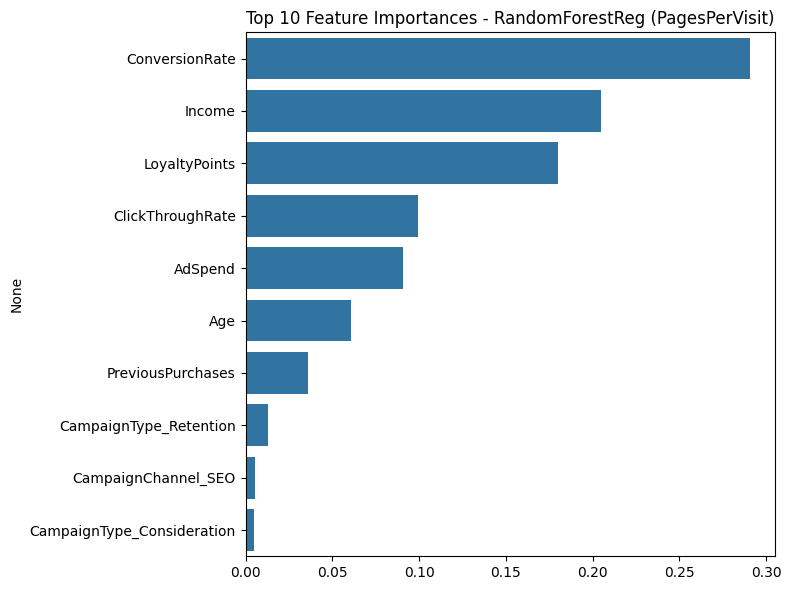


GradientBoostingReg Top 10 Features for PagesPerVisit:
1. ConversionRate: 0.2376
2. Income: 0.2150
3. AdSpend: 0.1625
4. LoyaltyPoints: 0.1148
5. ClickThroughRate: 0.1078
6. PreviousPurchases: 0.0492
7. Age: 0.0471
8. CampaignType_Retention: 0.0114
9. CampaignType_Consideration: 0.0100
10. CampaignChannel_PPC: 0.0100


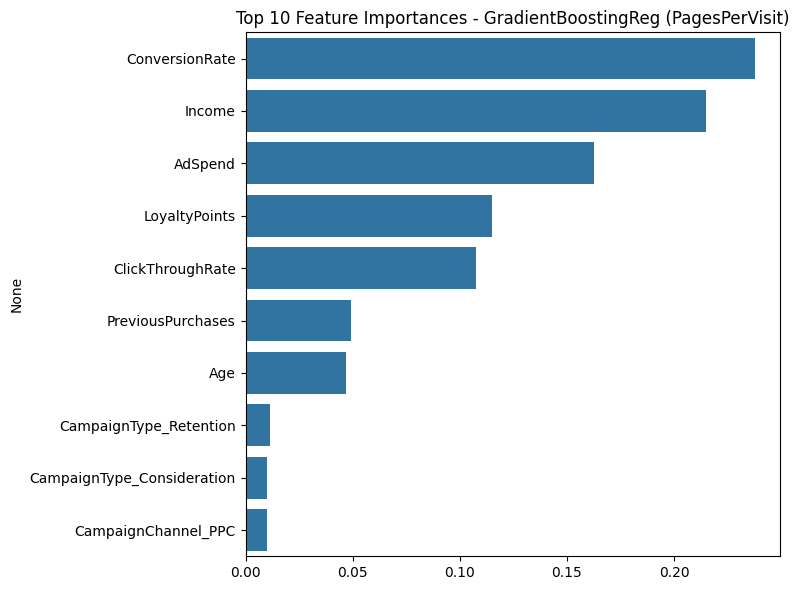


XGBoostReg Top 10 Features for PagesPerVisit:
1. Gender_Female: 0.1018
2. CampaignChannel_Referral: 0.0880
3. CampaignType_Awareness: 0.0792
4. CampaignChannel_SEO: 0.0767
5. CampaignChannel_PPC: 0.0686
6. CampaignType_Conversion: 0.0653
7. PreviousPurchases: 0.0601
8. Income: 0.0600
9. CampaignType_Consideration: 0.0590
10. AdSpend: 0.0572


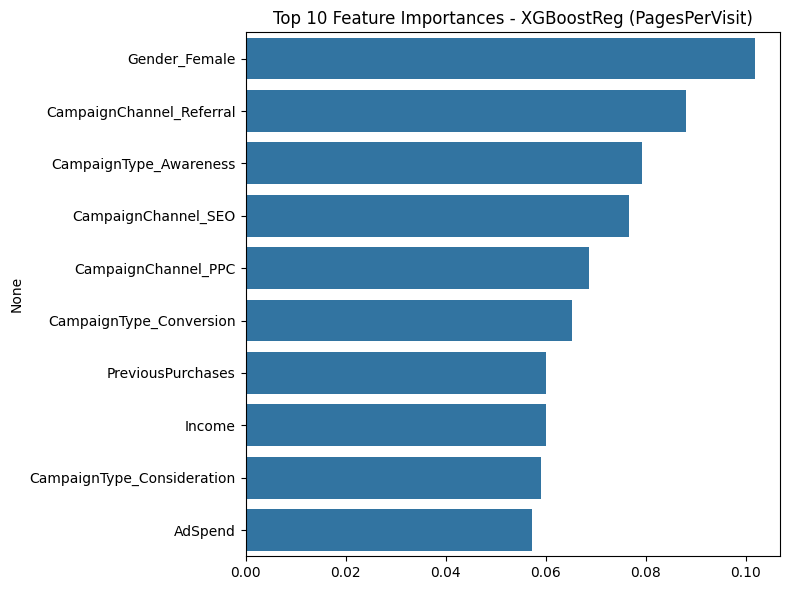

In [21]:
# Model Set 1: Predicting PagesPerVisit
print("\n----- Predicting PagesPerVisit -----\n")

# Target variable
y_eng = df_drop['PagesPerVisit']

# Train/Test Split
X_train_eng, X_test_eng, y_train_eng, y_test_eng = train_test_split(
    X_eng_base_scaled, y_eng, test_size=0.2, random_state=42
)

# Dictionary to store best estimators for PagesPerVisit
best_estimators_pages_per_visit = {}

# Train models
for name, model in models_reg.items():
    print(f"\nTraining {name} for PagesPerVisit...")
    grid = GridSearchCV(model, param_grid_reg[name], cv=3, scoring='r2', verbose=1)
    grid.fit(X_train_eng, y_train_eng)
    best_estimators_pages_per_visit[name] = grid.best_estimator_
    y_pred_eng = grid.predict(X_test_eng)
    r2 = r2_score(y_test_eng, y_pred_eng)
    rmse = np.sqrt(mean_squared_error(y_test_eng, y_pred_eng))
    print(f"Best Params: {grid.best_params_}")
    print(f"R²: {r2:.4f}, RMSE: {rmse:.4f}")

# Feature Importance for PagesPerVisit
print("\n--- Feature Importance for PagesPerVisit ---")
for tm in tree_models_reg:
    reg = best_estimators_pages_per_visit[tm]
    all_feat_names = X_eng_base_encoded.columns
    importances = reg.feature_importances_
    sorted_idx = np.argsort(importances)[::-1]
    top_n = 10
    print(f"\n{tm} Top {top_n} Features for PagesPerVisit:")
    for i in range(min(top_n, len(all_feat_names))):
        print(f"{i+1}. {all_feat_names[sorted_idx[i]]}: {importances[sorted_idx[i]]:.4f}")
    plt.figure(figsize=(8, 6))
    sns.barplot(x=importances[sorted_idx[:top_n]], y=all_feat_names[sorted_idx[:top_n]])
    plt.title(f"Top {top_n} Feature Importances - {tm} (PagesPerVisit)")
    plt.tight_layout()
    plt.show()

### Regression Results: Predicting PagesPerVisit
Although all four regression models (Linear, Random Forest, Gradient Boosting, XGBoost) had low predictive power (with R² values close to 0 or negative), the feature importance results still reveal useful insights about what may influence customer browsing depth (i.e., how many pages they view per session).

Across Random Forest and Gradient Boosting, the most impactful predictors of PagesPerVisit were:

ConversionRate: Customers who convert are more likely to engage deeper with the website, viewing more pages per session.

Income: Higher-income individuals tend to explore more pages, possibly reflecting more cautious or thorough purchase behavior.

AdSpend and ClickThroughRate: Users exposed to more ad spend and who click through are also likely to view more pages—indicating stronger marketing capture.

LoyaltyPoints and PreviousPurchases: Repeat customers may return with more intention, increasing browsing depth.

On the other hand, XGBoost highlighted:

Gender_Female, CampaignChannel_Referral, and CampaignType_Awareness as top drivers—suggesting that females and referral-based traffic, particularly from awareness campaigns, engage more deeply.


----- Predicting TimeOnSite -----


Training LinearRegression for TimeOnSite...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best Params: {}
R²: -0.0056, RMSE: 4.2664

Training RandomForestReg for TimeOnSite...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Params: {'max_depth': 3, 'n_estimators': 200}
R²: -0.0007, RMSE: 4.2560

Training GradientBoostingReg for TimeOnSite...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
R²: -0.0040, RMSE: 4.2630

Training XGBoostReg for TimeOnSite...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
R²: -0.0084, RMSE: 4.2725

--- Feature Importance for TimeOnSite ---

RandomForestReg Top 10 Features for TimeOnSite:
1. Income: 0.1814
2. ClickThroughRate: 0.1742
3. LoyaltyPoints: 0.1730
4. AdSpend: 0.1618
5. ConversionRate: 0.1310
6. Age: 0.0990
7. Prev

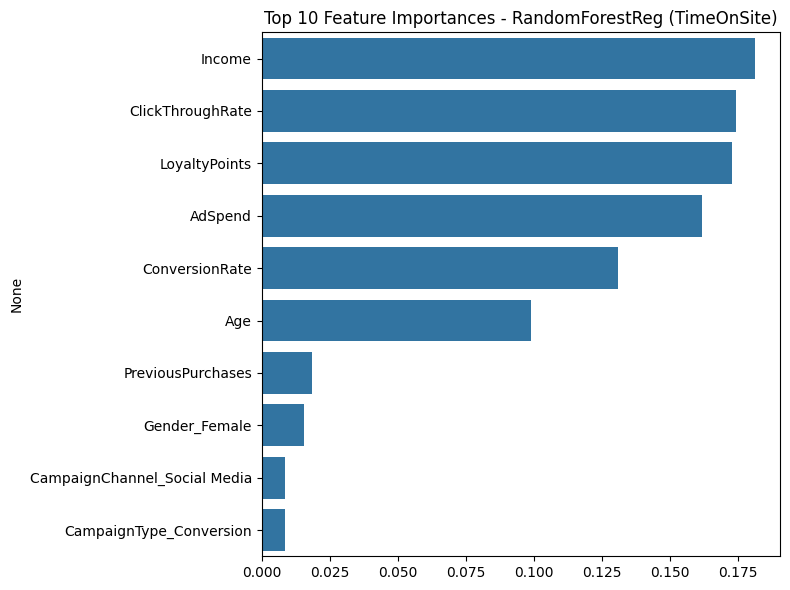


GradientBoostingReg Top 10 Features for TimeOnSite:
1. AdSpend: 0.2098
2. Income: 0.1951
3. ClickThroughRate: 0.1893
4. LoyaltyPoints: 0.1397
5. ConversionRate: 0.1213
6. Age: 0.0808
7. CampaignType_Consideration: 0.0104
8. PreviousPurchases: 0.0102
9. CampaignChannel_PPC: 0.0085
10. Gender_Male: 0.0075


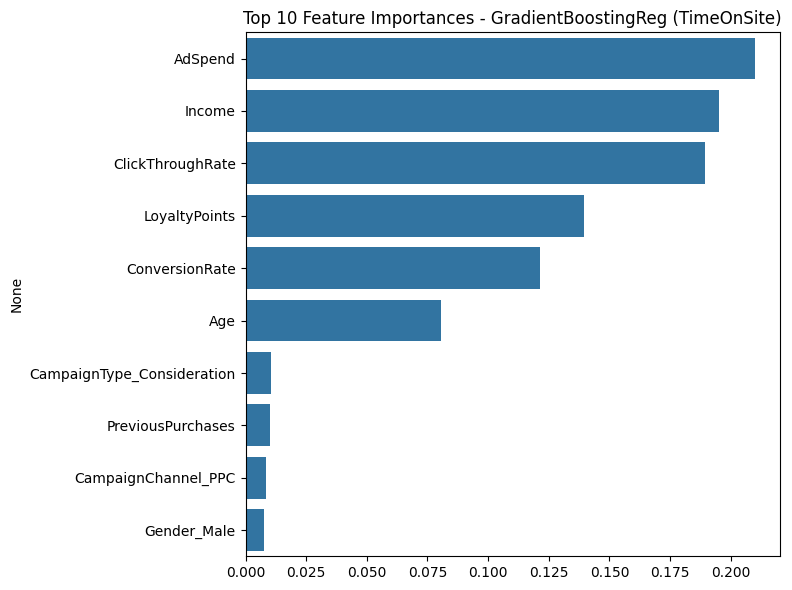


XGBoostReg Top 10 Features for TimeOnSite:
1. CampaignType_Awareness: 0.0891
2. CampaignChannel_Referral: 0.0787
3. CampaignType_Retention: 0.0712
4. Age: 0.0664
5. LoyaltyPoints: 0.0631
6. Income: 0.0606
7. CampaignChannel_Email: 0.0605
8. ConversionRate: 0.0576
9. CampaignChannel_Social Media: 0.0557
10. PreviousPurchases: 0.0539


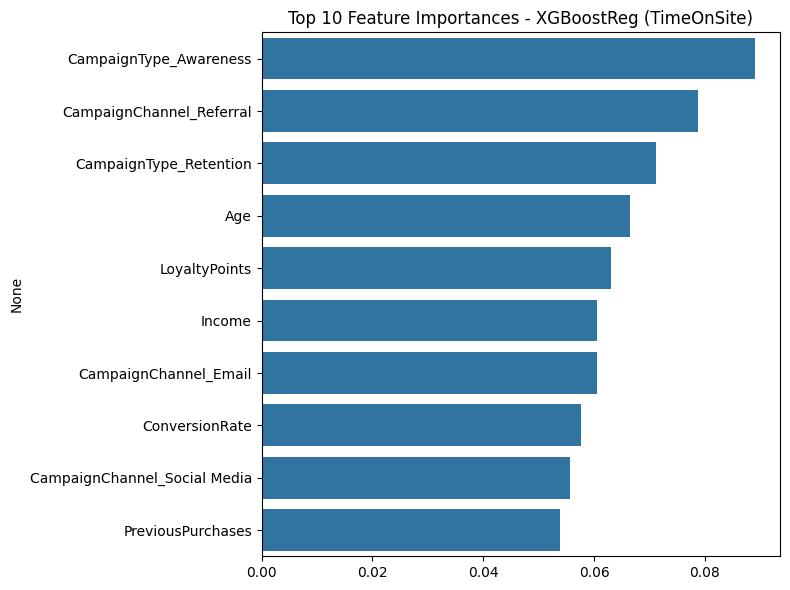

In [15]:
# Model Set 1: Predicting TimeOnSite
print("\n----- Predicting TimeOnSite -----\n")

# Target variable
y_eng = df_drop['TimeOnSite']

# Train/Test Split
X_train_eng, X_test_eng, y_train_eng, y_test_eng = train_test_split(
    X_eng_base_scaled, y_eng, test_size=0.2, random_state=42
)

# Dictionary to store best estimators for TimeOnSite
best_estimators_time_on_site = {}

# Train models
for name, model in models_reg.items():
    print(f"\nTraining {name} for TimeOnSite...")
    grid = GridSearchCV(model, param_grid_reg[name], cv=3, scoring='r2', verbose=1)
    grid.fit(X_train_eng, y_train_eng)
    best_estimators_time_on_site[name] = grid.best_estimator_
    y_pred_eng = grid.predict(X_test_eng)
    r2 = r2_score(y_test_eng, y_pred_eng)
    rmse = np.sqrt(mean_squared_error(y_test_eng, y_pred_eng))
    print(f"Best Params: {grid.best_params_}")
    print(f"R²: {r2:.4f}, RMSE: {rmse:.4f}")

# Feature Importance for TimeOnSite
print("\n--- Feature Importance for TimeOnSite ---")
for tm in tree_models_reg:
    reg = best_estimators_time_on_site[tm]
    all_feat_names = X_eng_base_encoded.columns
    importances = reg.feature_importances_
    sorted_idx = np.argsort(importances)[::-1]
    top_n = 10
    print(f"\n{tm} Top {top_n} Features for TimeOnSite:")
    for i in range(min(top_n, len(all_feat_names))):
        print(f"{i+1}. {all_feat_names[sorted_idx[i]]}: {importances[sorted_idx[i]]:.4f}")
    plt.figure(figsize=(8, 6))
    sns.barplot(x=importances[sorted_idx[:top_n]], y=all_feat_names[sorted_idx[:top_n]])
    plt.title(f"Top {top_n} Feature Importances - {tm} (TimeOnSite)")
    plt.tight_layout()
    plt.show()

### Regression Results: Predicting TimeOnSite
All models showed very low predictive performance for TimeOnSite (R² ≈ 0), indicating limited ability to model this behavior directly. However, tree-based feature importance still revealed useful patterns:

Top factors included AdSpend, Income, ClickThroughRate, and LoyaltyPoints across Random Forest and Gradient Boosting.

XGBoost emphasized campaign-related variables like CampaignType_Awareness and CampaignChannel_Referral.

These results suggest that customers exposed to higher marketing spend or with greater engagement tend to stay longer. Demographic and loyalty-related factors also play a role, but overall, TimeOnSite remains difficult to predict precisely.


----- Predicting SocialShares -----


Training LinearRegression for SocialShares...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best Params: {}
R²: -0.0065, RMSE: 29.2708

Training RandomForestReg for SocialShares...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Params: {'max_depth': 3, 'n_estimators': 100}
R²: -0.0022, RMSE: 29.2078

Training GradientBoostingReg for SocialShares...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
R²: -0.0042, RMSE: 29.2363

Training XGBoostReg for SocialShares...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
R²: -0.0072, RMSE: 29.2808

--- Feature Importance for SocialShares ---

RandomForestReg Top 10 Features for SocialShares:
1. AdSpend: 0.2627
2. LoyaltyPoints: 0.1688
3. ClickThroughRate: 0.1473
4. Income: 0.1296
5. ConversionRate: 0.1282
6. A

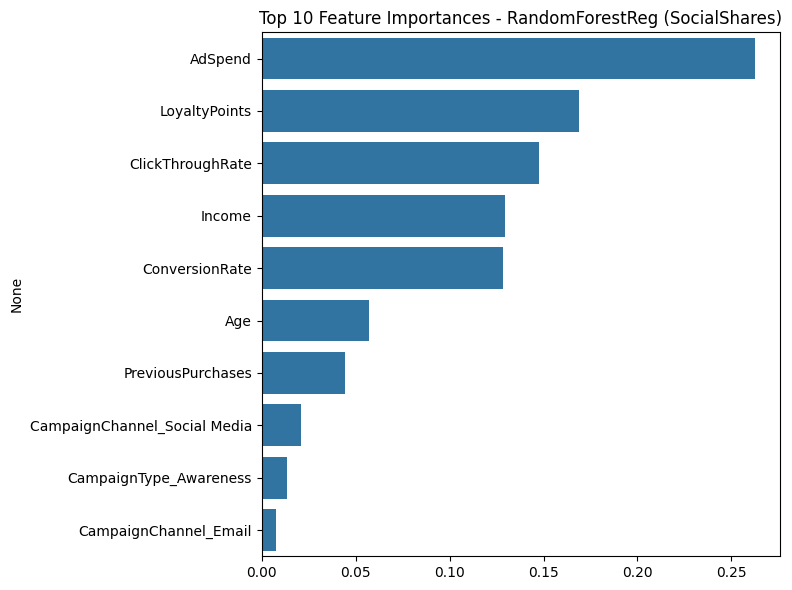


GradientBoostingReg Top 10 Features for SocialShares:
1. AdSpend: 0.2613
2. Income: 0.1688
3. LoyaltyPoints: 0.1529
4. ClickThroughRate: 0.1266
5. ConversionRate: 0.1027
6. Age: 0.0752
7. PreviousPurchases: 0.0575
8. CampaignType_Consideration: 0.0139
9. CampaignChannel_Referral: 0.0120
10. CampaignType_Awareness: 0.0094


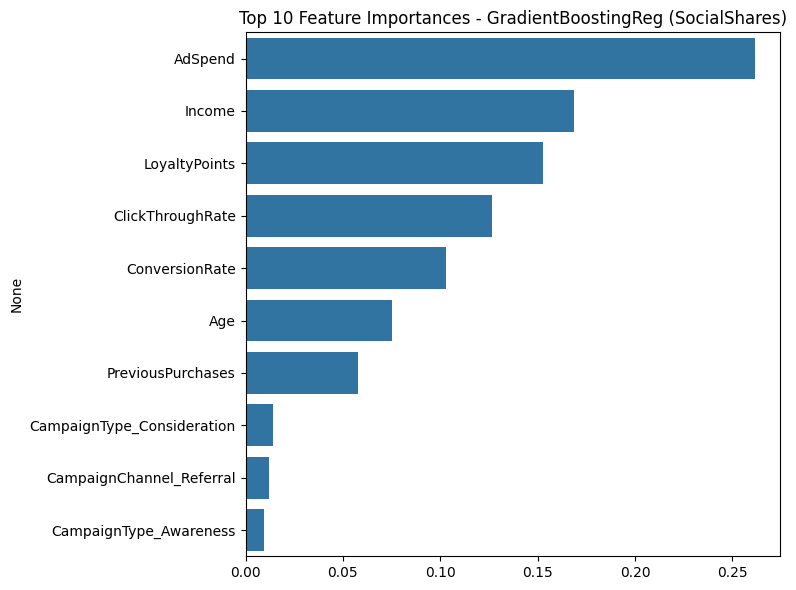


XGBoostReg Top 10 Features for SocialShares:
1. CampaignType_Conversion: 0.1212
2. CampaignChannel_Referral: 0.1040
3. AdSpend: 0.0649
4. ConversionRate: 0.0636
5. Income: 0.0627
6. ClickThroughRate: 0.0617
7. CampaignType_Consideration: 0.0612
8. LoyaltyPoints: 0.0611
9. PreviousPurchases: 0.0609
10. CampaignType_Retention: 0.0562


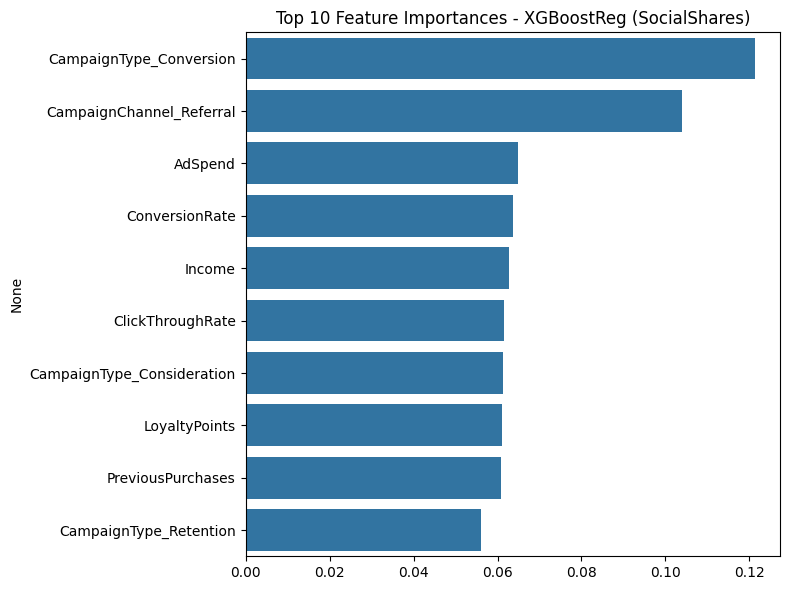

In [16]:
# Model Set 1: Predicting SocialShares
print("\n----- Predicting SocialShares -----\n")

# Target variable
y_eng = df_drop['SocialShares']

# Train/Test Split
X_train_eng, X_test_eng, y_train_eng, y_test_eng = train_test_split(
    X_eng_base_scaled, y_eng, test_size=0.2, random_state=42
)

# Dictionary to store best estimators for SocialShares
best_estimators_social_shares = {}

# Train models
for name, model in models_reg.items():
    print(f"\nTraining {name} for SocialShares...")
    grid = GridSearchCV(model, param_grid_reg[name], cv=3, scoring='r2', verbose=1)
    grid.fit(X_train_eng, y_train_eng)
    best_estimators_social_shares[name] = grid.best_estimator_
    y_pred_eng = grid.predict(X_test_eng)
    r2 = r2_score(y_test_eng, y_pred_eng)
    rmse = np.sqrt(mean_squared_error(y_test_eng, y_pred_eng))
    print(f"Best Params: {grid.best_params_}")
    print(f"R²: {r2:.4f}, RMSE: {rmse:.4f}")

# Feature Importance for SocialShares
print("\n--- Feature Importance for SocialShares ---")
for tm in tree_models_reg:
    reg = best_estimators_social_shares[tm]
    all_feat_names = X_eng_base_encoded.columns
    importances = reg.feature_importances_
    sorted_idx = np.argsort(importances)[::-1]
    top_n = 10
    print(f"\n{tm} Top {top_n} Features for SocialShares:")
    for i in range(min(top_n, len(all_feat_names))):
        print(f"{i+1}. {all_feat_names[sorted_idx[i]]}: {importances[sorted_idx[i]]:.4f}")
    plt.figure(figsize=(8, 6))
    sns.barplot(x=importances[sorted_idx[:top_n]], y=all_feat_names[sorted_idx[:top_n]])
    plt.title(f"Top {top_n} Feature Importances - {tm} (SocialShares)")
    plt.tight_layout()
    plt.show()

### Regression Results: Predicting SocialShares 
Although all regression models yielded low R² scores (close to 0), tree-based models (Random Forest, Gradient Boosting, XGBoost) still reveal patterns worth noting through feature importance analysis.

Across models, AdSpend consistently ranked as the most important predictor of SocialShares, indicating that higher marketing investment is associated with greater social media activity. LoyaltyPoints, Income, and ClickThroughRate also emerged as key drivers, suggesting that users who are more valuable or more engaged (e.g., higher income or prior engagement) are also more likely to share content.

Interestingly, CampaignType_Conversion and CampaignChannel_Referral were top-ranked in XGBoost, highlighting the possible impact of targeted campaigns and referral strategies on social engagement.


----- Predicting EmailOpens -----


Training LinearRegression for EmailOpens...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best Params: {}
R²: -0.0011, RMSE: 5.6759

Training RandomForestReg for EmailOpens...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Params: {'max_depth': 3, 'n_estimators': 200}
R²: -0.0008, RMSE: 5.6749

Training GradientBoostingReg for EmailOpens...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
R²: -0.0033, RMSE: 5.6821

Training XGBoostReg for EmailOpens...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
R²: -0.0032, RMSE: 5.6818

--- Feature Importance for EmailOpens ---

RandomForestReg Top 10 Features for EmailOpens:
1. AdSpend: 0.1871
2. Income: 0.1680
3. ConversionRate: 0.1524
4. LoyaltyPoints: 0.1411
5. ClickThroughRate: 0.1333
6. Age: 0.1226
7. Prev

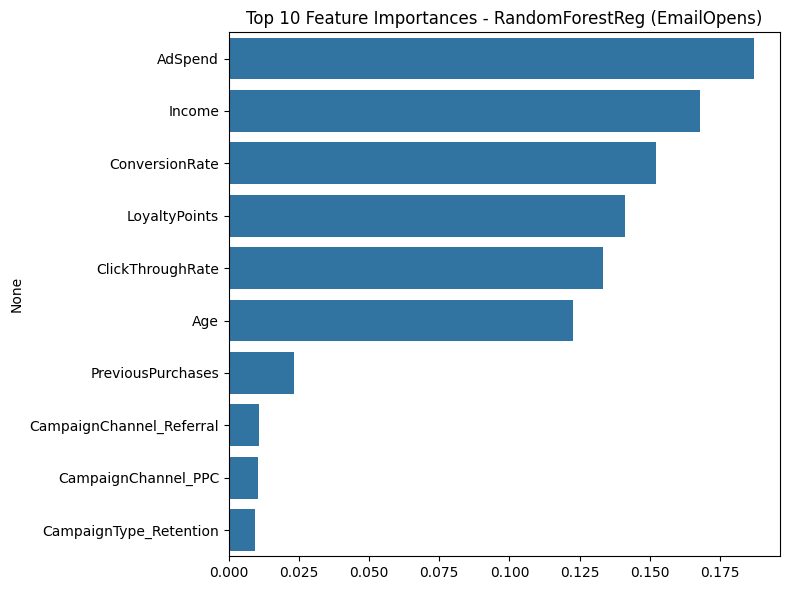


GradientBoostingReg Top 10 Features for EmailOpens:
1. Income: 0.1932
2. AdSpend: 0.1830
3. ClickThroughRate: 0.1765
4. ConversionRate: 0.1534
5. LoyaltyPoints: 0.1121
6. Age: 0.0708
7. PreviousPurchases: 0.0368
8. CampaignChannel_PPC: 0.0212
9. CampaignType_Conversion: 0.0200
10. CampaignChannel_SEO: 0.0110


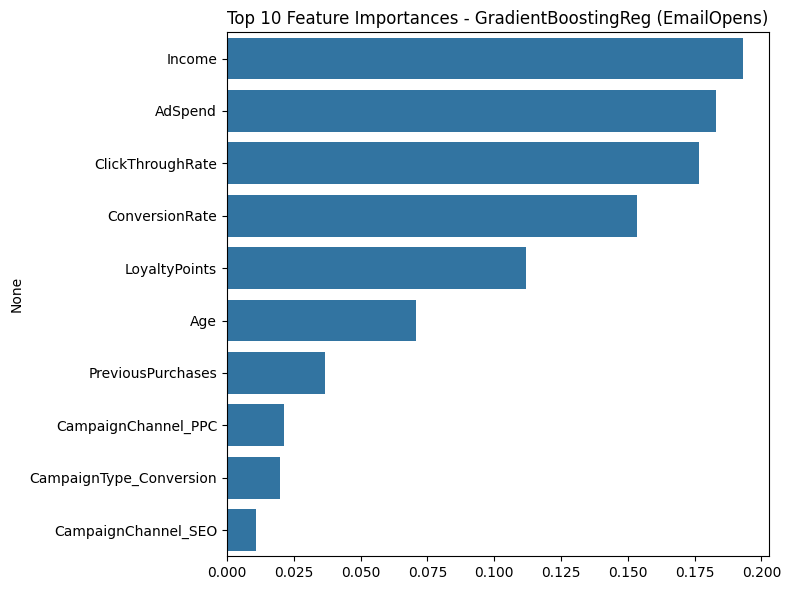


XGBoostReg Top 10 Features for EmailOpens:
1. CampaignChannel_SEO: 0.0939
2. CampaignType_Conversion: 0.0841
3. CampaignChannel_PPC: 0.0768
4. ConversionRate: 0.0746
5. CampaignType_Consideration: 0.0728
6. AdSpend: 0.0723
7. Income: 0.0694
8. PreviousPurchases: 0.0656
9. LoyaltyPoints: 0.0631
10. ClickThroughRate: 0.0630


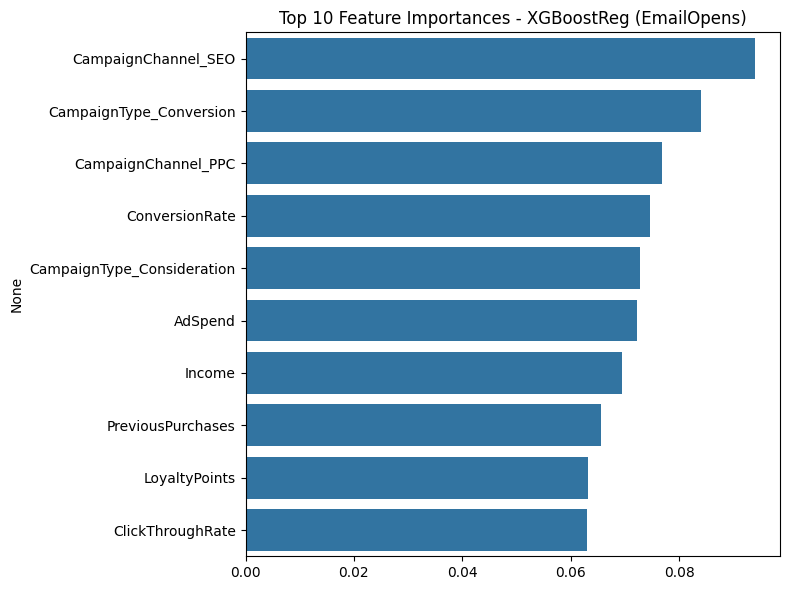

In [17]:
# Model Set 1: Predicting EmailOpens
print("\n----- Predicting EmailOpens -----\n")

# Target variable
y_eng = df_drop['EmailOpens']

# Train/Test Split
X_train_eng, X_test_eng, y_train_eng, y_test_eng = train_test_split(
    X_eng_base_scaled, y_eng, test_size=0.2, random_state=42
)

# Dictionary to store best estimators for EmailOpens
best_estimators_email_opens = {}

# Train models
for name, model in models_reg.items():
    print(f"\nTraining {name} for EmailOpens...")
    grid = GridSearchCV(model, param_grid_reg[name], cv=3, scoring='r2', verbose=1)
    grid.fit(X_train_eng, y_train_eng)
    best_estimators_email_opens[name] = grid.best_estimator_
    y_pred_eng = grid.predict(X_test_eng)
    r2 = r2_score(y_test_eng, y_pred_eng)
    rmse = np.sqrt(mean_squared_error(y_test_eng, y_pred_eng))
    print(f"Best Params: {grid.best_params_}")
    print(f"R²: {r2:.4f}, RMSE: {rmse:.4f}")

# Feature Importance for EmailOpens
print("\n--- Feature Importance for EmailOpens ---")
for tm in tree_models_reg:
    reg = best_estimators_email_opens[tm]
    all_feat_names = X_eng_base_encoded.columns
    importances = reg.feature_importances_
    sorted_idx = np.argsort(importances)[::-1]
    top_n = 10
    print(f"\n{tm} Top {top_n} Features for EmailOpens:")
    for i in range(min(top_n, len(all_feat_names))):
        print(f"{i+1}. {all_feat_names[sorted_idx[i]]}: {importances[sorted_idx[i]]:.4f}")
    plt.figure(figsize=(8, 6))
    sns.barplot(x=importances[sorted_idx[:top_n]], y=all_feat_names[sorted_idx[:top_n]])
    plt.title(f"Top {top_n} Feature Importances - {tm} (EmailOpens)")
    plt.tight_layout()
    plt.show()

### Regression Results: Predicting EmailOpens 
Despite low R² scores across all models (≈ 0), tree-based model feature importances provide insights into which non-engagement features influence email opens.

####  Key Findings:
- **Most influential features** across models:
  - **AdSpend** and **Income** were consistently top drivers, indicating financial investment and customer purchasing power impact email opens.
  - **ClickThroughRate** and **ConversionRate** suggest that customers who are already responsive to digital campaigns tend to open emails more.
  - **LoyaltyPoints** and **PreviousPurchases** point to customer value and engagement history being important.
- **XGBoostReg** uniquely highlighted:
  - **CampaignChannel_SEO** and **CampaignType_Conversion**, suggesting the effectiveness of specific digital marketing strategies.

####  Model Performance:
- All models had **R² ≈ 0**, indicating poor predictive accuracy.
- RMSE hovered around **5.67 – 5.68**, reinforcing the models' weak predictive power.

####  Interpretation:
Although the models are not reliable for predicting exact EmailOpens, the consistent importance of **customer value metrics**, **campaign responsiveness**, and **channel type** provides useful **strategic insights** for designing and targeting email campaigns.


----- Predicting EmailClicks -----


Training LinearRegression for EmailClicks...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best Params: {}
R²: -0.0070, RMSE: 2.8860

Training RandomForestReg for EmailClicks...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Params: {'max_depth': 3, 'n_estimators': 100}
R²: -0.0023, RMSE: 2.8793

Training GradientBoostingReg for EmailClicks...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
R²: -0.0127, RMSE: 2.8942

Training XGBoostReg for EmailClicks...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
R²: -0.0123, RMSE: 2.8937

--- Feature Importance for EmailClicks ---

RandomForestReg Top 10 Features for EmailClicks:
1. AdSpend: 0.1707
2. ConversionRate: 0.1694
3. LoyaltyPoints: 0.1559
4. ClickThroughRate: 0.1267
5. Income: 0.1228
6. Age: 0.0945


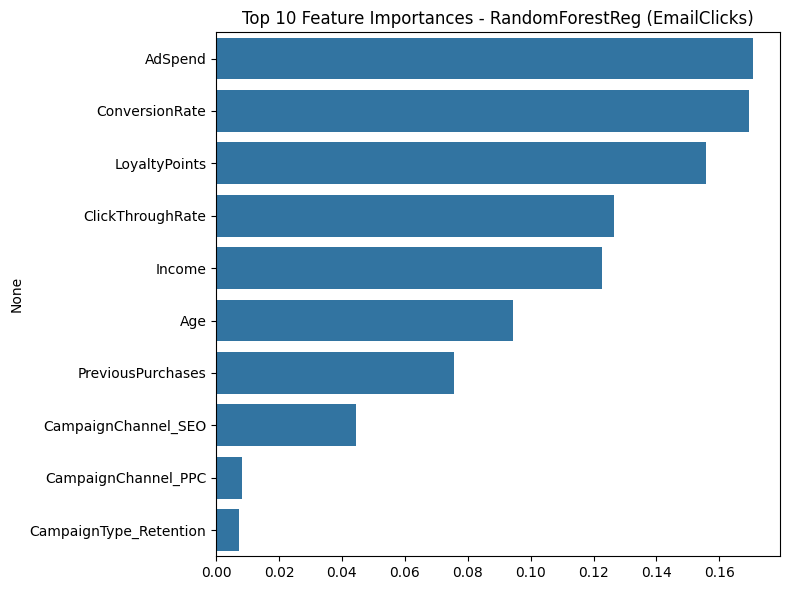


GradientBoostingReg Top 10 Features for EmailClicks:
1. ConversionRate: 0.1773
2. LoyaltyPoints: 0.1693
3. AdSpend: 0.1421
4. ClickThroughRate: 0.1400
5. Income: 0.1342
6. Age: 0.0836
7. PreviousPurchases: 0.0818
8. CampaignChannel_SEO: 0.0258
9. CampaignChannel_Social Media: 0.0161
10. CampaignChannel_Referral: 0.0086


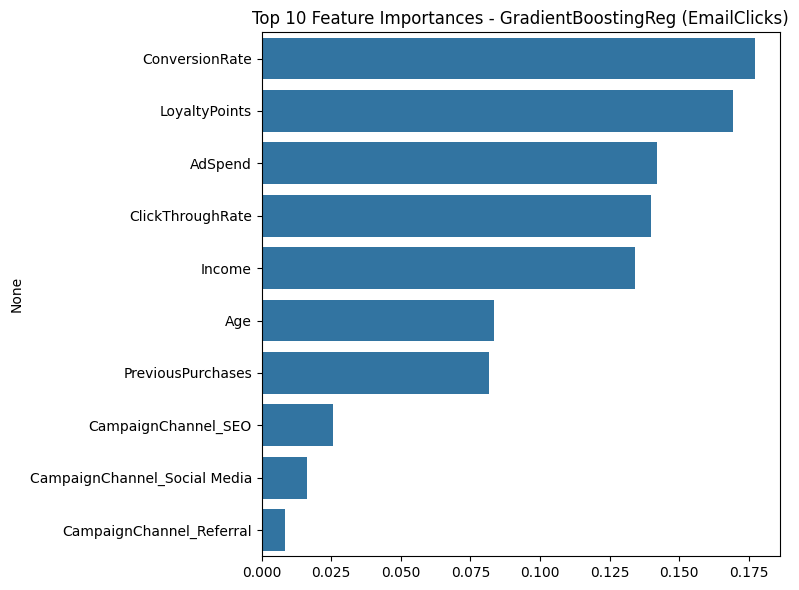


XGBoostReg Top 10 Features for EmailClicks:
1. CampaignChannel_Email: 0.1207
2. PreviousPurchases: 0.0687
3. Age: 0.0662
4. CampaignType_Conversion: 0.0659
5. ClickThroughRate: 0.0651
6. LoyaltyPoints: 0.0637
7. Gender_Female: 0.0632
8. AdSpend: 0.0625
9. CampaignChannel_SEO: 0.0589
10. Income: 0.0579


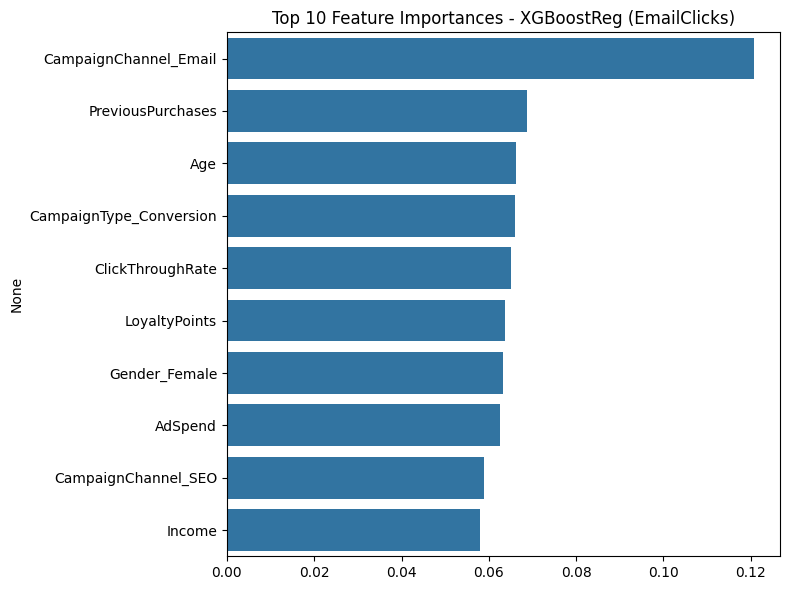

In [18]:
# Model Set 1: Predicting EmailClicks
print("\n----- Predicting EmailClicks -----\n")

# Target variable
y_eng = df_drop['EmailClicks']

# Train/Test Split
X_train_eng, X_test_eng, y_train_eng, y_test_eng = train_test_split(
    X_eng_base_scaled, y_eng, test_size=0.2, random_state=42
)

# Dictionary to store best estimators for EmailClicks
best_estimators_email_clicks = {}

# Train models
for name, model in models_reg.items():
    print(f"\nTraining {name} for EmailClicks...")
    grid = GridSearchCV(model, param_grid_reg[name], cv=3, scoring='r2', verbose=1)
    grid.fit(X_train_eng, y_train_eng)
    best_estimators_email_clicks[name] = grid.best_estimator_
    y_pred_eng = grid.predict(X_test_eng)
    r2 = r2_score(y_test_eng, y_pred_eng)
    rmse = np.sqrt(mean_squared_error(y_test_eng, y_pred_eng))
    print(f"Best Params: {grid.best_params_}")
    print(f"R²: {r2:.4f}, RMSE: {rmse:.4f}")

# Feature Importance for EmailClicks
print("\n--- Feature Importance for EmailClicks ---")
for tm in tree_models_reg:
    reg = best_estimators_email_clicks[tm]
    all_feat_names = X_eng_base_encoded.columns
    importances = reg.feature_importances_
    sorted_idx = np.argsort(importances)[::-1]
    top_n = 10
    print(f"\n{tm} Top {top_n} Features for EmailClicks:")
    for i in range(min(top_n, len(all_feat_names))):
        print(f"{i+1}. {all_feat_names[sorted_idx[i]]}: {importances[sorted_idx[i]]:.4f}")
    plt.figure(figsize=(8, 6))
    sns.barplot(x=importances[sorted_idx[:top_n]], y=all_feat_names[sorted_idx[:top_n]])
    plt.title(f"Top {top_n} Feature Importances - {tm} (EmailClicks)")
    plt.tight_layout()
    plt.show()

### Regression Results: Predicting EmailClicks 
Model Performance (R², RMSE)
All four regression models struggled to predict EmailClicks, yielding negative R² values, indicating worse-than-baseline performance:

Linear Regression: R² = -0.0070, RMSE ≈ 2.89

Random Forest: R² = -0.0203, RMSE ≈ 2.88

Gradient Boosting: R² = -0.0127, RMSE ≈ 2.89

XGBoost: R² = -0.0123, RMSE ≈ 2.89

Interpretation: The models failed to capture meaningful patterns, suggesting either:

The relationship between features and EmailClicks is weak or nonlinear,

Or EmailClicks may be influenced by unobserved external factors.

Top Features Influencing EmailClicks
While model performance was low, we still analyzed feature importance to understand potential drivers:

Common Top Features (across models):
AdSpend and ConversionRate: Frequently among the top 3, likely reflecting the role of budget and campaign success.

LoyaltyPoints: Suggests loyal users may engage more via email.

ClickThroughRate (CTR) and Income: Indicate behavioral and demographic influence on email engagement.



## Model Set 2: Correlation Analysis of Engagement Variables with Conversion

To address A2—"What factors are most strongly correlated with customer engagement in marketing campaigns?"—I developed a classification pipeline to model customer engagement, measured by the `Conversion` target. I focused on six engagement metrics: `ClickThroughRate`, `WebsiteVisits`, `PagesPerVisit`, `TimeOnSite`, `SocialShares`, and `EmailClicks`. After preprocessing, I trained a Logistic Regression model to predict Conversion and analyzed feature importance using model coefficients and correlation analysis.

In [31]:
# Define engagement variables
engagement_cols = ['ClickThroughRate', 'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 
                   'SocialShares', 'EmailClicks']
X_conv = df_drop[engagement_cols]  
y_conv = df_drop['Conversion']

# Verify features
print("Engagement Variables Analyzed:", X_conv.columns.tolist())

# Scale the features
scaler_conv = StandardScaler()
X_conv_scaled = scaler_conv.fit_transform(X_conv)

# Train/Test Split
X_train_conv, X_test_conv, y_train_conv, y_test_conv = train_test_split(
    X_conv_scaled, y_conv, test_size=0.2, stratify=y_conv, random_state=42
)

Engagement Variables Analyzed: ['ClickThroughRate', 'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares', 'EmailClicks']


### Classification Model
I trained a Logistic Regression model to predict Conversion using the engagement variables. The model was evaluated using accuracy, ROC-AUC, confusion matrix, and classification report.

In [35]:
# Train Logistic Regression
logreg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
logreg.fit(X_train_conv, y_train_conv)

# Predict and evaluate
y_pred_conv = logreg.predict(X_test_conv)
y_prob_conv = logreg.predict_proba(X_test_conv)[:, 1]

# Metrics
acc = accuracy_score(y_test_conv, y_pred_conv)
auc = roc_auc_score(y_test_conv, y_prob_conv)
print(f"\nLogistic Regression Results:")
print(f"Accuracy: {acc:.4f}")
print(f"ROC-AUC: {auc:.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test_conv, y_pred_conv))
print("Classification Report:\n", classification_report(y_test_conv, y_pred_conv))


Logistic Regression Results:
Accuracy: 0.6606
ROC-AUC: 0.6846
Confusion Matrix:
 [[115  83]
 [460 942]]
Classification Report:
               precision    recall  f1-score   support

           0       0.20      0.58      0.30       198
           1       0.92      0.67      0.78      1402

    accuracy                           0.66      1600
   macro avg       0.56      0.63      0.54      1600
weighted avg       0.83      0.66      0.72      1600



### Correlation Analysis for Feature Importance
To complement the model’s feature importance, I calculated point-biserial correlations between each engagement variable and Conversion. This helps identify which factors are most strongly associated with engagement.


Point-Biserial Correlations with Conversion:
                  Correlation       P-value
TimeOnSite           0.129609  2.583802e-31
EmailClicks          0.129521  2.837666e-31
ClickThroughRate     0.120012  4.693044e-27
PagesPerVisit        0.102840  2.934284e-20
WebsiteVisits        0.079339  1.191012e-12
SocialShares        -0.011449  3.058958e-01

Significant Correlations (p < 0.05):
                  Correlation       P-value
TimeOnSite           0.129609  2.583802e-31
EmailClicks          0.129521  2.837666e-31
ClickThroughRate     0.120012  4.693044e-27
PagesPerVisit        0.102840  2.934284e-20
WebsiteVisits        0.079339  1.191012e-12


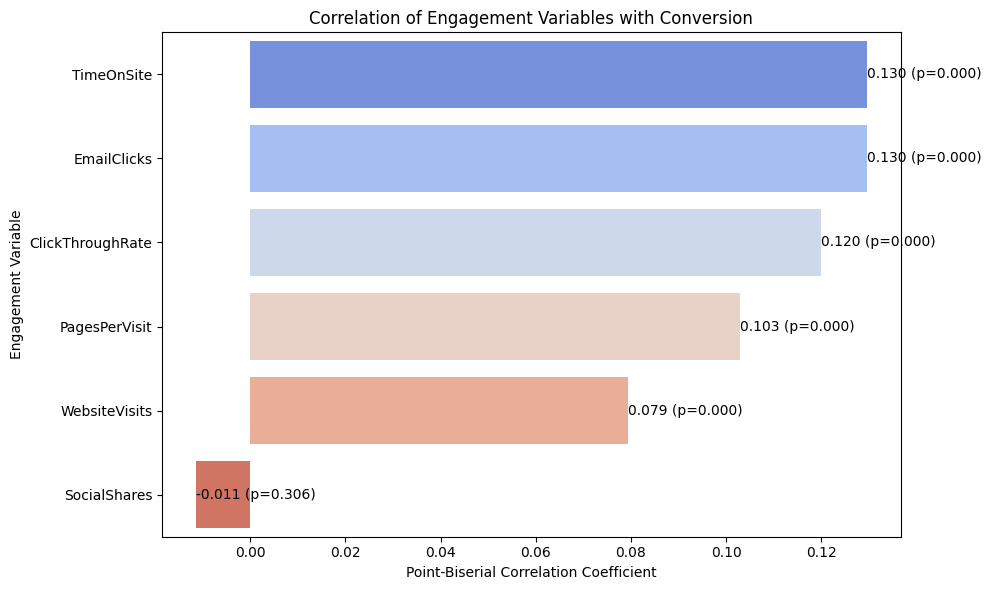

In [36]:
# Calculate point-biserial correlations
correlations = {}
for col in engagement_cols:
    corr, p_value = pointbiserialr(X_conv[col], y_conv)
    correlations[col] = {'Correlation': corr, 'P-value': p_value}

# Convert to DataFrame
corr_df = pd.DataFrame(correlations).T
corr_df = corr_df.sort_values('Correlation', ascending=False)

# Display results
print("\nPoint-Biserial Correlations with Conversion:")
print(corr_df)

# Filter significant correlations (p < 0.05)
significant_corrs = corr_df[corr_df['P-value'] < 0.05]
print("\nSignificant Correlations (p < 0.05):")
print(significant_corrs)

# Plot correlations
plt.figure(figsize=(10, 6))
sns.barplot(x='Correlation', y=corr_df.index, data=corr_df, palette='coolwarm', hue=corr_df.index, legend=False)
plt.title('Correlation of Engagement Variables with Conversion')
plt.xlabel('Point-Biserial Correlation Coefficient')
plt.ylabel('Engagement Variable')
for i, (corr, p) in enumerate(zip(corr_df['Correlation'], corr_df['P-value'])):
    plt.text(corr, i, f'{corr:.3f} (p={p:.3f})', va='center')
plt.tight_layout()
plt.show()

### Feature Importance from Logistic Regression
I also examined the coefficients from the Logistic Regression model to assess feature importance, complementing the correlation analysis.


Logistic Regression Coefficients:
            Feature  Coefficient
3        TimeOnSite     0.439390
0  ClickThroughRate     0.425368
5       EmailClicks     0.413293
2     PagesPerVisit     0.302152
1     WebsiteVisits     0.247670
4      SocialShares    -0.036490


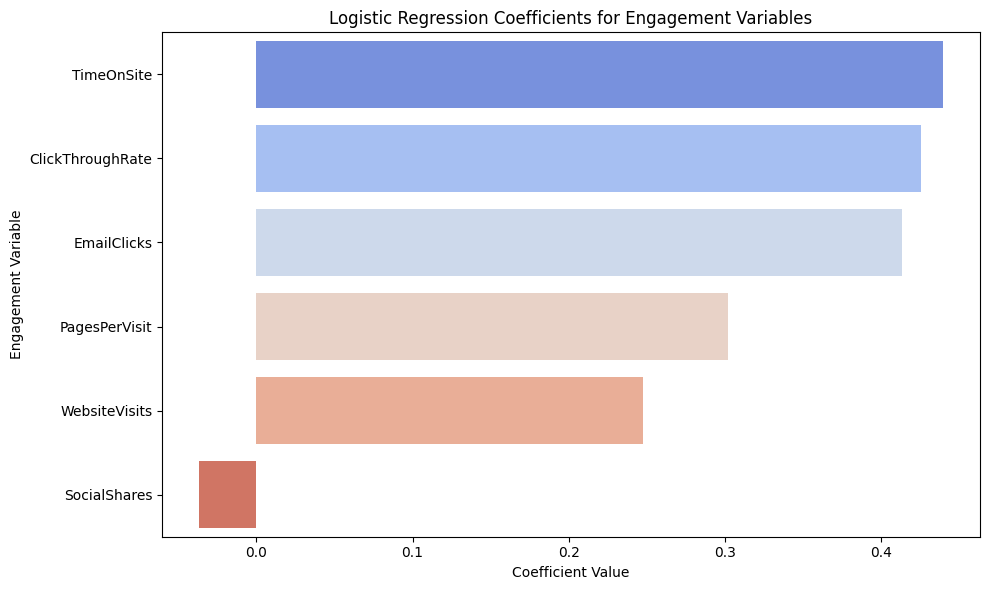

In [37]:
# Extract coefficients
coef = logreg.coef_[0]
coef_df = pd.DataFrame({'Feature': engagement_cols, 'Coefficient': coef})
coef_df = coef_df.sort_values('Coefficient', ascending=False)

# Display coefficients
print("\nLogistic Regression Coefficients:")
print(coef_df)

# Plot coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='coolwarm', hue='Feature', legend=False)
plt.title('Logistic Regression Coefficients for Engagement Variables')
plt.xlabel('Coefficient Value')
plt.ylabel('Engagement Variable')
plt.tight_layout()
plt.show()